Data directory: /home/jannes/.cache/kagglehub/datasets/lara311/flowers-five-classes/versions/1
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Image batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


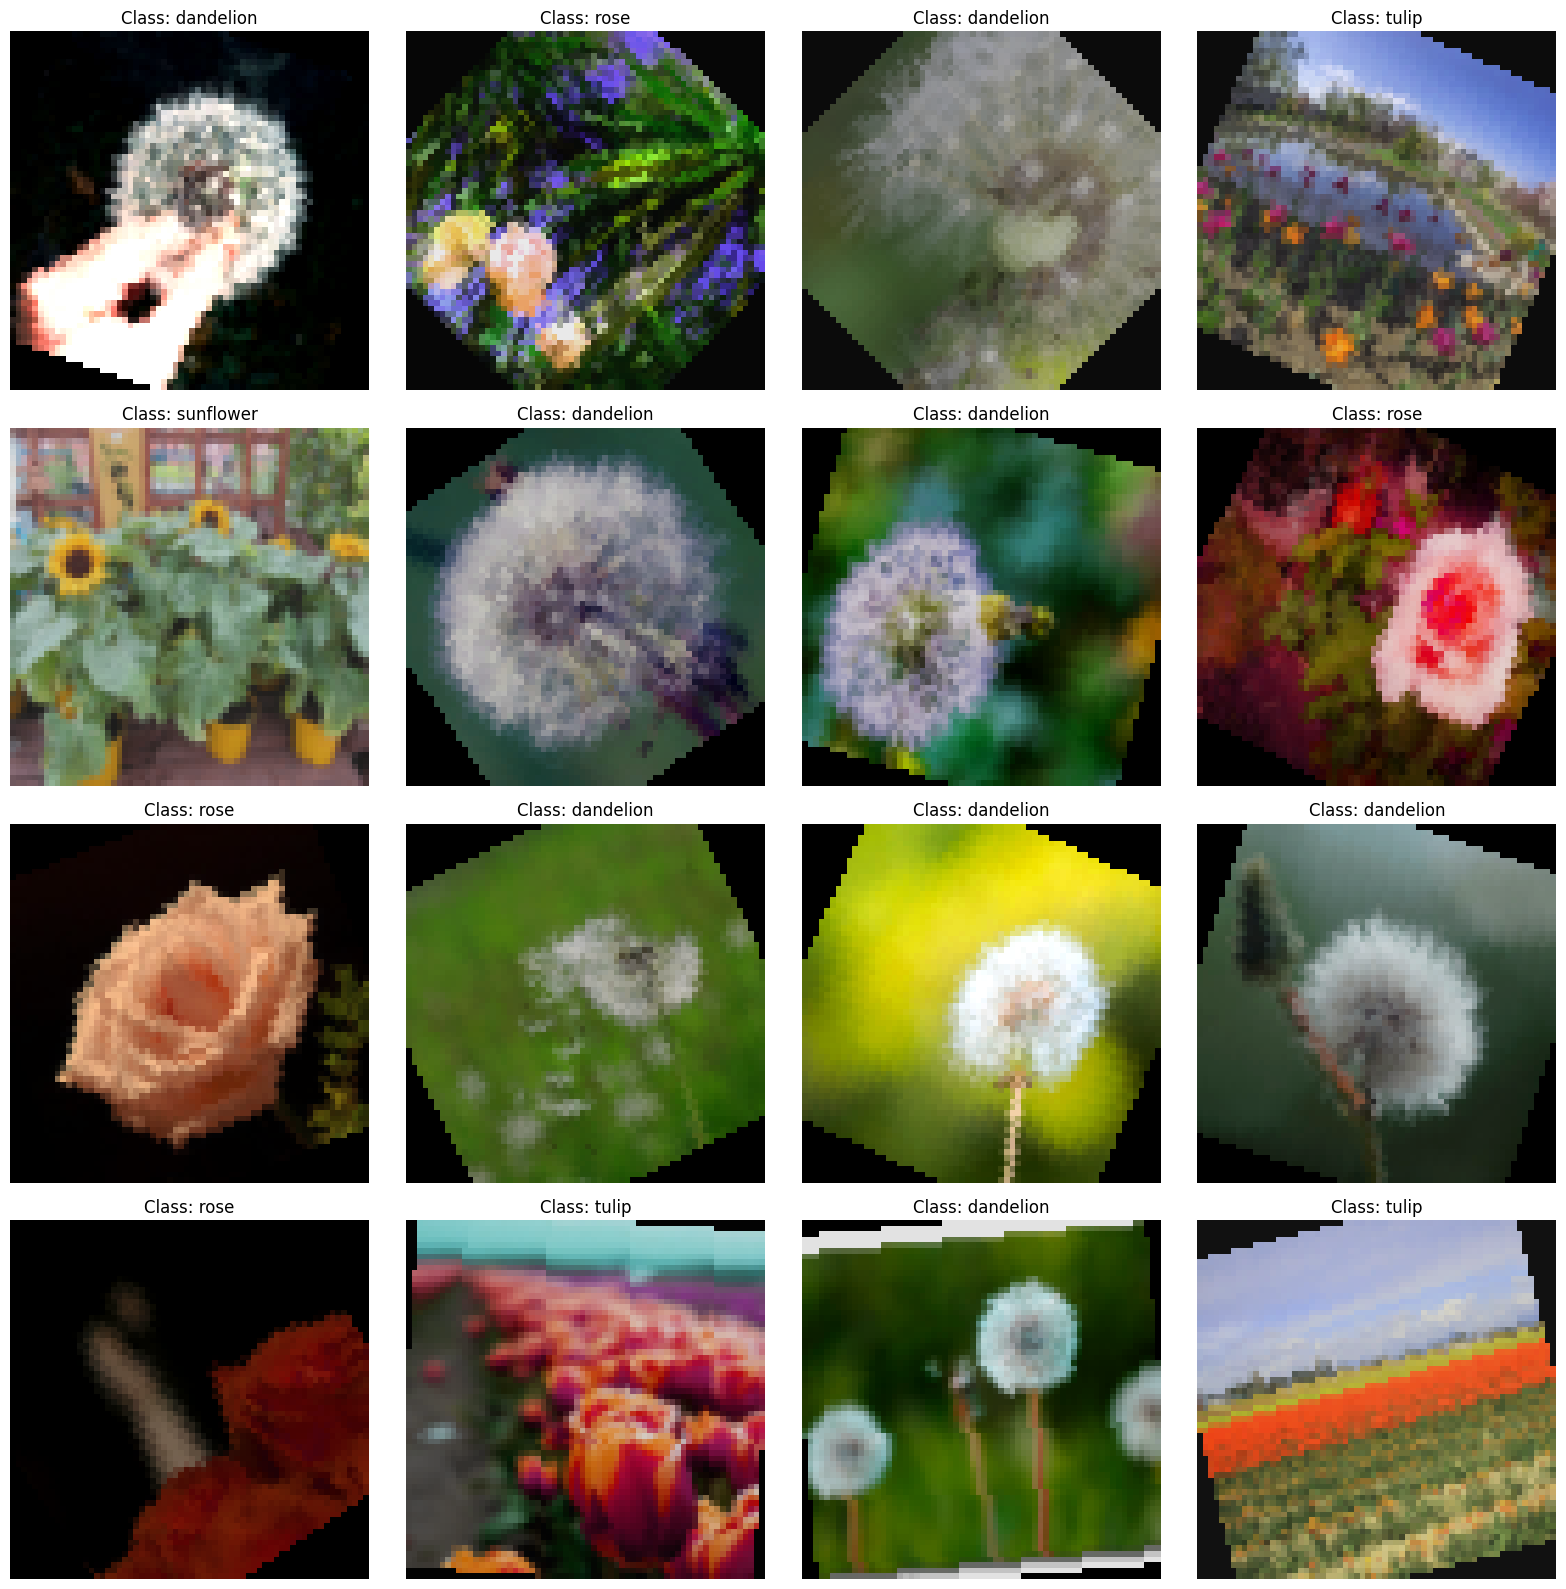

In [2]:
import matplotlib.pyplot as plt
import torch

from udl_project.data_handling.custom_data_loader import CustomDataLoader
from udl_project.data_handling.flower_dataset import FlowerDataset

flower_dataset = FlowerDataset(train_test_split=0.8)
dataloader = CustomDataLoader.create_dataloader(flower_dataset, augment_data=True)

train_loader = dataloader.get_train_dataloader()
data_iter = iter(train_loader)
images, labels = next(data_iter)


def show_augmented_images(images, labels, class_names, num_images=16):
    """Display a grid of augmented images."""
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    axes = axes.flatten()

    for i in range(min(num_images, len(images))):
        img = images[i].clone()
        img = torch.clamp(img, 0, 1)
        img_np = img.permute(1, 2, 0).numpy()
        axes[i].imshow(img_np)
        axes[i].set_title(f"Class: {class_names[labels[i]]}")
        axes[i].axis("off")

    # Hide unused axes if batch size < num_images
    for j in range(i + 1, num_images):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


class_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
print(f"Classes: {class_names}")
print(f"Image batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")

show_augmented_images(images, labels, class_names)